Calculation of VWAP: The VWAP is calculated by multiplying the price of each trade by its corresponding volume, summing up these values over a given time period (typically a trading day), and dividing by the total volume traded during that period.

Interpretation: The VWAP line on a chart represents the average price at which most of the trading activity has occurred. It provides a reference point to assess whether the current market price is above or below the average price.

Mean Reversion: One way to use VWAP is as a mean reversion strategy. If the current market price is significantly above the VWAP, it may suggest that the stock is overvalued, and a trader might consider selling or shorting it. Conversely, if the price is significantly below the VWAP, it may indicate an undervalued stock, prompting a trader to consider buying or going long.

Trend Confirmation: VWAP can also be used to confirm the direction of a trend. If the stock price is consistently trading above the VWAP, it could indicate a bullish trend, while prices trading consistently below the VWAP may signal a bearish trend. Traders may use this information to align their trades with the prevailing trend.

Trading Execution: Traders often use VWAP as a reference point for executing large orders. They aim to buy below the VWAP or sell above it to obtain a favorable average price for their trades. By splitting large orders into smaller ones and executing them gradually throughout the day, traders can minimize market impact and reduce the risk of significantly affecting the stock's price.

In [15]:
import pandas as pd
import yfinance as yf
from datetime import date
import matplotlib.pyplot as plt
import numpy as np

In [16]:
stocksymbols = 'TATASTEEL.NS'
ticker = yf.Ticker(stocksymbols)
end = date.today()
start = "2020-01-01"
df = ticker.history(interval="1d",start=start,end=end)
df.index = df.index.strftime('%d-%m-%y')
df.index = pd.to_datetime(df.index, format='%d-%m-%y')
df = df.loc[:,['Open','High','Low','Close','Volume']]
df = df.round(2)
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2023-05-22,105.0,105.25,104.30,105.00,21588716
2023-05-23,105.1,106.05,105.00,105.60,21304034
2023-05-24,105.1,105.80,104.90,105.20,28454367
2023-05-25,105.0,105.20,104.30,104.85,25885062
2023-05-26,105.0,106.75,104.95,106.40,28362042


In [17]:
'''
Formula of VWAP
The formula for calculating VWAP is the cumulative typical price multiplied by total volume and divided by the cumulative volume. It goes as follows:

VWAP = [Cumulative (Price * Volume)]/[Cumulative Volume]
'''
def calculate_vwap(df):
    cumulative_volume = []
    previous_cumulative_volume = 0

    # Calculate the Typical Price =  (High + Low + Close)/3
    df['Typical_Price'] = (df['Close'] + df['High'] + df['Low']) / 3

    # Calculate the Volume_Typical_Price  = (Typical Price * Volume)
    df['Volume_Typical_Price'] = df['Typical_Price'] * df['Volume']

    # Calculate the cumulative sum of volume_Typical_Price
    df['Cumulative_Volume_Typical_Price'] = df['Volume_Typical_Price'].cumsum()

    # Calculate the cumulative sum of volume
    cumulative_volume = df['Volume'].cumsum()

    # VWAP = Cumulative (Volume * Typical Price) / Cumulative Volume
    df['VWAP'] = df['Cumulative_Volume_Typical_Price'] / cumulative_volume

    return df

df1 = calculate_vwap(df)
print(df1)
print(df1.columns)

              Open    High     Low   Close     Volume  Typical_Price  \
Date                                                                   
2020-01-01   20.05   20.19   19.70   19.82  121005300      19.903333   
2020-01-02   20.00   20.67   20.00   20.55  216749610      20.406667   
2020-01-03   20.47   20.61   20.32   20.50  129568630      20.476667   
2020-01-06   20.34   20.34   19.94   20.06   96016080      20.113333   
2020-01-07   20.15   20.54   20.07   20.18  131957880      20.263333   
...            ...     ...     ...     ...        ...            ...   
2023-05-22  105.00  105.25  104.30  105.00   21588716     104.850000   
2023-05-23  105.10  106.05  105.00  105.60   21304034     105.550000   
2023-05-24  105.10  105.80  104.90  105.20   28454367     105.300000   
2023-05-25  105.00  105.20  104.30  104.85   25885062     104.783333   
2023-05-26  105.00  106.75  104.95  106.40   28362042     106.033333   

            Volume_Typical_Price  Cumulative_Volume_Typical_Pri

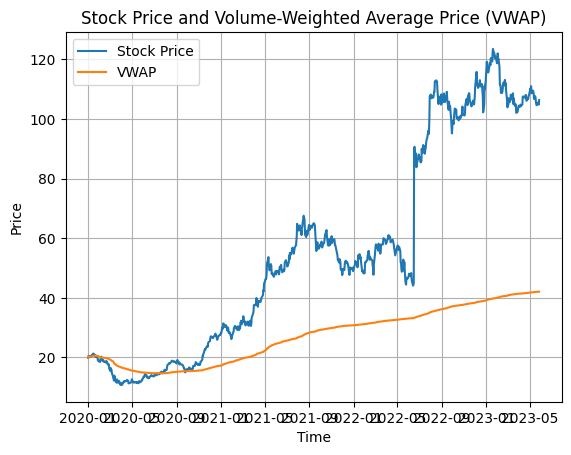

In [18]:
def plot_vwap(df):
    # Plot stock price and VWAP
    plt.plot(df.index, df['Close'], label='Stock Price')
    plt.plot(df.index, df['VWAP'], label='VWAP')
    plt.title('Stock Price and Volume-Weighted Average Price (VWAP)')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_vwap(df1)

In [19]:
def calculate_mean_reversion(df):
    # Calculate VWAP
    df['VWAP'] = df['Volume_Typical_Price'] / df['Volume']

    # Calculate mean reversion
    df['Mean_Reversion'] = df['Close'] - df['VWAP']

    # Determine overvalued, undervalued, or neutral
    df['Mean_Reversion_Status'] = df['Mean_Reversion'].apply(lambda x: 'Overvalued' if x > 0.2 else ('Undervalued' if x < -0.2 else 'Neutral'))

    return df
df2 = calculate_mean_reversion(df1)
print(df2)
print(df2.columns)

              Open    High     Low   Close     Volume  Typical_Price  \
Date                                                                   
2020-01-01   20.05   20.19   19.70   19.82  121005300      19.903333   
2020-01-02   20.00   20.67   20.00   20.55  216749610      20.406667   
2020-01-03   20.47   20.61   20.32   20.50  129568630      20.476667   
2020-01-06   20.34   20.34   19.94   20.06   96016080      20.113333   
2020-01-07   20.15   20.54   20.07   20.18  131957880      20.263333   
...            ...     ...     ...     ...        ...            ...   
2023-05-22  105.00  105.25  104.30  105.00   21588716     104.850000   
2023-05-23  105.10  106.05  105.00  105.60   21304034     105.550000   
2023-05-24  105.10  105.80  104.90  105.20   28454367     105.300000   
2023-05-25  105.00  105.20  104.30  104.85   25885062     104.783333   
2023-05-26  105.00  106.75  104.95  106.40   28362042     106.033333   

            Volume_Typical_Price  Cumulative_Volume_Typical_Pri

In [20]:
def calculate_trend_confirmation(df):
    # Calculate trend confirmation
    df['Trend_Confirmation'] = df.apply(lambda row: 'Bullish' if row['Close'] > row['VWAP'] else ('Bearish' if row['Close'] < row['VWAP'] else 'Neutral'), axis=1)

    return df
df3 = calculate_trend_confirmation(df2)
print(df3)
print(df3.columns)

              Open    High     Low   Close     Volume  Typical_Price  \
Date                                                                   
2020-01-01   20.05   20.19   19.70   19.82  121005300      19.903333   
2020-01-02   20.00   20.67   20.00   20.55  216749610      20.406667   
2020-01-03   20.47   20.61   20.32   20.50  129568630      20.476667   
2020-01-06   20.34   20.34   19.94   20.06   96016080      20.113333   
2020-01-07   20.15   20.54   20.07   20.18  131957880      20.263333   
...            ...     ...     ...     ...        ...            ...   
2023-05-22  105.00  105.25  104.30  105.00   21588716     104.850000   
2023-05-23  105.10  106.05  105.00  105.60   21304034     105.550000   
2023-05-24  105.10  105.80  104.90  105.20   28454367     105.300000   
2023-05-25  105.00  105.20  104.30  104.85   25885062     104.783333   
2023-05-26  105.00  106.75  104.95  106.40   28362042     106.033333   

            Volume_Typical_Price  Cumulative_Volume_Typical_Pri

In [21]:
def calculate_trading_execution(df):
    # Calculate trading execution
    df['Trading_Execution'] = df.apply(lambda row: 'Buy' if row['Close'] < row['VWAP'] else ('Sell' if row['Close'] > row['VWAP'] else 'Neutral'), axis=1)

    return df
df4 = calculate_trading_execution(df3)
print(df4)
print(df4.columns)

              Open    High     Low   Close     Volume  Typical_Price  \
Date                                                                   
2020-01-01   20.05   20.19   19.70   19.82  121005300      19.903333   
2020-01-02   20.00   20.67   20.00   20.55  216749610      20.406667   
2020-01-03   20.47   20.61   20.32   20.50  129568630      20.476667   
2020-01-06   20.34   20.34   19.94   20.06   96016080      20.113333   
2020-01-07   20.15   20.54   20.07   20.18  131957880      20.263333   
...            ...     ...     ...     ...        ...            ...   
2023-05-22  105.00  105.25  104.30  105.00   21588716     104.850000   
2023-05-23  105.10  106.05  105.00  105.60   21304034     105.550000   
2023-05-24  105.10  105.80  104.90  105.20   28454367     105.300000   
2023-05-25  105.00  105.20  104.30  104.85   25885062     104.783333   
2023-05-26  105.00  106.75  104.95  106.40   28362042     106.033333   

            Volume_Typical_Price  Cumulative_Volume_Typical_Pri